In [8]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [9]:
# Parameters
Lx, Lz = 20,1
Nx, Nz = 1280, 64
Ra_M = 7.0e6
M_0 = 0
M_H = -1


Prandtl = 1.0
stop_sim_time = 2400

nu = (Ra_M / (Prandtl*(M_0-M_H)*Lz**3))**(-1/2)

In [10]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5', 'analysis/analysis_s3.h5', 'analysis/analysis_s4.h5', 'analysis/analysis_s5.h5', 'analysis/analysis_s6.h5', 'analysis/analysis_s7.h5', 'analysis/analysis_s8.h5', 'analysis/analysis_s9.h5', 'analysis/analysis_s10.h5', 'analysis/analysis_s11.h5', 'analysis/analysis_s12.h5', 'analysis/analysis_s13.h5', 'analysis/analysis_s14.h5', 'analysis/analysis_s15.h5', 'analysis/analysis_s16.h5', 'analysis/analysis_s17.h5', 'analysis/analysis_s18.h5', 'analysis/analysis_s19.h5', 'analysis/analysis_s20.h5', 'analysis/analysis_s21.h5']


In [3]:
"""
DEBUGGING CONTROL GROUP
"""
folder_dir = "snapshots"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uuyy = file['tasks']['uy']
        uuxz = file['tasks']['u']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uuuyyy = np.transpose(uuyy[t, :, :])
            uuxz_trans = np.transpose(uuxz[t, :, :])
            print(np.average(uuuyyy), np.sum(np.square(uuuyyy)))
            print(np.average(uuxz_trans), np.sum(np.square(uuxz_trans)),np.max(uuxz_trans), np.min(uuxz_trans))
            uxxuzz = np.ndarray.tolist(uuxz_trans)
            for lay_1 in range(len(uuxz_trans)):
                for lay_2 in range(len(uuxz_trans[lay_1])):
                    modulus = np.linalg.norm(uuxz_trans[lay_1][lay_2])
                    uxxuzz[lay_1][lay_2] = modulus
            to_plot = np.square(uuuyyy)+np.square(uxxuzz)
            all_tot_ke.append(np.sum(to_plot))
            if t == 8:
                break
        print(len(all_tot_ke))
        print(np.max(all_tot_ke))
#print(all_tot_ke[])

0.0 0.0
0.0 0.0 0.0 0.0
1.0566428802567675e-14 1.0083517068012501e-10
-5.699884386822485e-13 6.592213392862299e-06 5.086848880430896e-05 -5.6185578148683935e-05
4.344908490104381e-14 4.487329663186076e-10
-1.254879069175968e-12 1.1051110605023217e-05 6.697051915596178e-05 -7.253559545079694e-05
8.882987689809822e-14 1.8471445672540414e-09
-1.5462038327180917e-12 1.8058171995491843e-05 8.298260114881326e-05 -8.822553831835761e-05
1.1261086603899066e-13 4.913594418254648e-09
-1.3652155729969555e-12 2.5742666655799264e-05 9.446364522580216e-05 -9.930109948245952e-05
1.1973497007611464e-13 8.677529416380547e-09
-1.1074779738286917e-12 3.2013292777533486e-05 0.00010980361963460665 -0.00010639913833250155
1.190870167593018e-13 1.4124774932334543e-08
-7.926765786664019e-13 3.9037774797500164e-05 0.0001264940352761325 -0.00011115362953280521
1.1031949963754924e-13 2.167342499763802e-08
-4.3323047708101263e-13 4.709010592100416e-05 0.00014515118953131717 -0.00011558824545183124
7.97223554127768

KeyboardInterrupt: 

In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""
mean KE
"""
all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))

[0.0, 3.6075636371841355e-10, 7.632839400245806e-10, 1.1524310846404094e-09, 1.5390474179874262e-09, 2.321487050049024e-09, 2.722964609806108e-09, 3.133968316547007e-09, 3.5565062541529577e-09, 3.992777427211863e-09]
0.25583934677679143


20358
20358


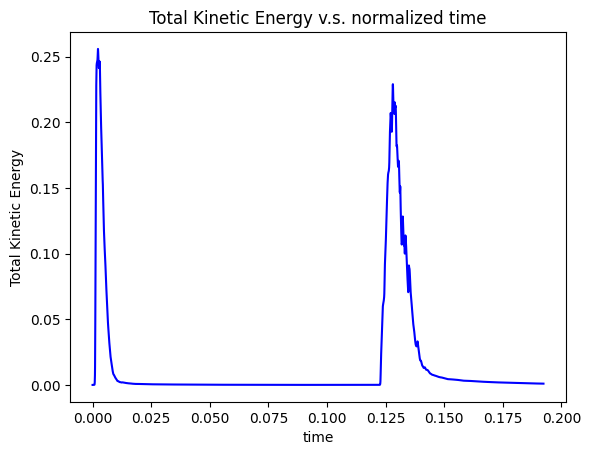

/state/partition1/job-40622197/ipykernel_1750124/4068205649.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


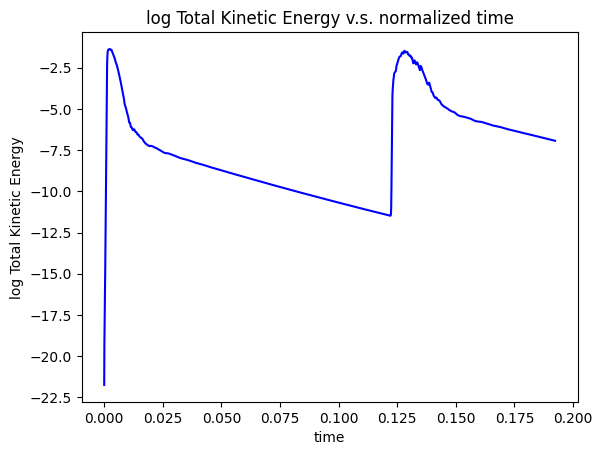

20358
20358


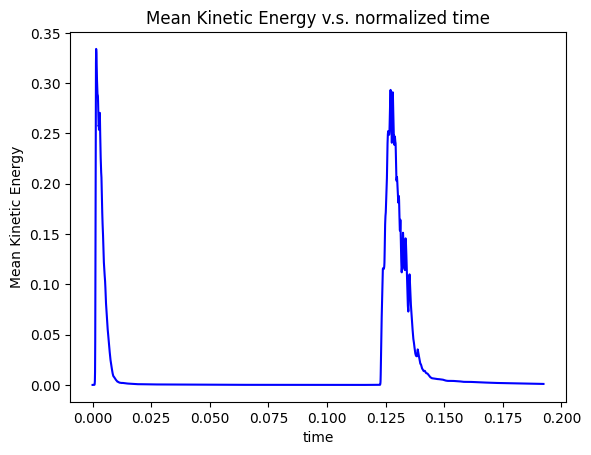

/state/partition1/job-40622197/ipykernel_1750124/4068205649.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')


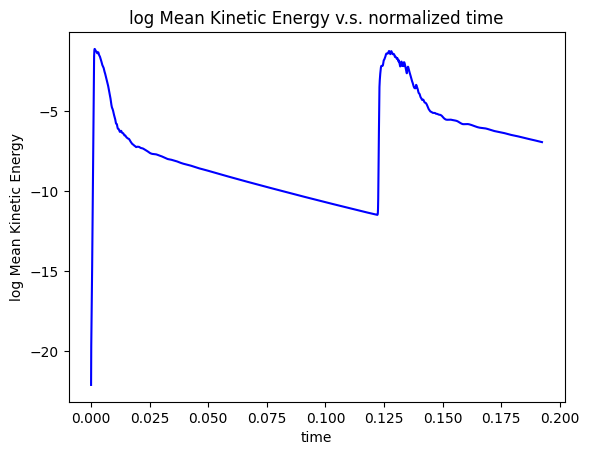

In [5]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
print(len(all_mean_ke))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

3.0318148129906126e-14
-3.2361732353919833e-12
-3.510013147987149e-16


20358
20358


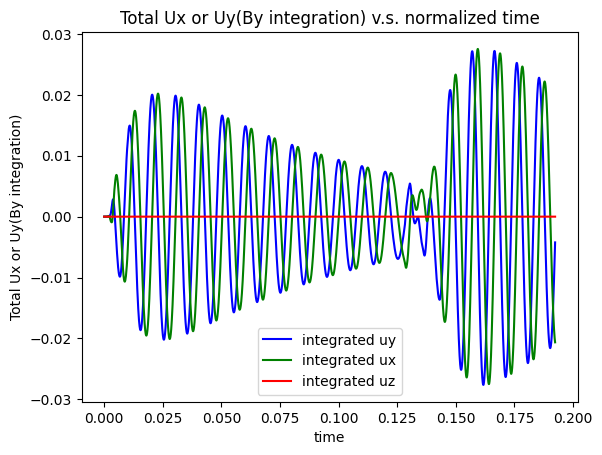

'\nI suspect that, because it is integrated, then total uz is always 0\n'

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()

"""
I suspect that, because it is integrated, then total uz is always 0
"""

In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

1.6840484694974213e-14
2.882575775785849e-10
8.641566665771294e-10


20358
20358


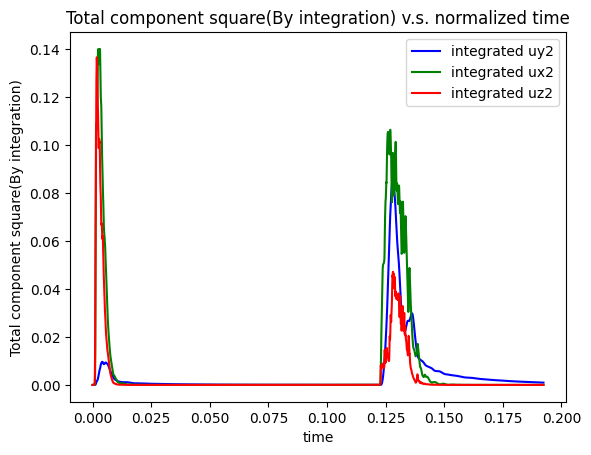

In [9]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x/10*nu/(2**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()

In [15]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

"""
trying to use Fourier series to approximate
"""


# Generate sample data (replace this with your dataset)
# first 1950 second approximation for uy
uy_for_approx_1 = np.array(all_tot_uy)[:15500]
time_1 = np.array([x/10 for x in range(1, len(uy_for_approx_1)+1)])
matrix_A_1 = np.vstack([np.ones(len(uy_for_approx_1)), np.cos(0.06 * time_1), np.sin(0.06 * time_1)]).T
regression_uy_1 = uy_for_approx_1[:, np.newaxis]
alpha_for_uy_1 = np.linalg.lstsq(matrix_A_1, regression_uy_1, rcond=None)[0]
print(alpha_for_uy_1)

# time after 1950 second approximation for uy
uy_for_approx_after = np.array(all_tot_uy)[15500:]
time_after = np.array([x/10 for x in range(1, len(uy_for_approx_after)+1)])
matrix_A_after = np.vstack([np.ones(len(uy_for_approx_after)), np.cos(0.065 * time_after), np.sin(0.065 * time_after)]).T
regression_uy_after = uy_for_approx_after[:, np.newaxis]
alpha_for_uy_after = np.linalg.lstsq(matrix_A_after, regression_uy_after, rcond=None)[0]
print(alpha_for_uy_after)

# first 1950 second approximation for ux
ux_for_approx_1 = np.array(all_tot_ux)[:15500]
matrix_A_1 = np.vstack([np.ones(len(ux_for_approx_1)), np.cos(0.06 * time_1), np.sin(0.06 * time_1)]).T
regression_ux_1 = ux_for_approx_1[:, np.newaxis]
alpha_for_ux_1 = np.linalg.lstsq(matrix_A_1, regression_ux_1, rcond=None)[0]
print(alpha_for_ux_1)

# time after 1950 second approximation for ux
ux_for_approx_after = np.array(all_tot_ux)[15500:]
matrix_A_after = np.vstack([np.ones(len(ux_for_approx_after)), np.cos(0.065 * time_after), np.sin(0.065 * time_after)]).T
regression_ux_after = ux_for_approx_after[:, np.newaxis]
alpha_for_ux_after = np.linalg.lstsq(matrix_A_after, regression_ux_after, rcond=None)[0]
print(alpha_for_ux_after)

3.0318148129906126e-14
-3.2361732353919833e-12
-3.510013147987149e-16
[[-0.00032287]
 [ 0.00982531]
 [ 0.00617252]]
[[-0.00038382]
 [ 0.00627284]
 [ 0.02287445]]
[[-0.00018318]
 [-0.00632635]
 [ 0.00990659]]
[[ 0.00081521]
 [-0.02212386]
 [ 0.00669884]]


20358
20358


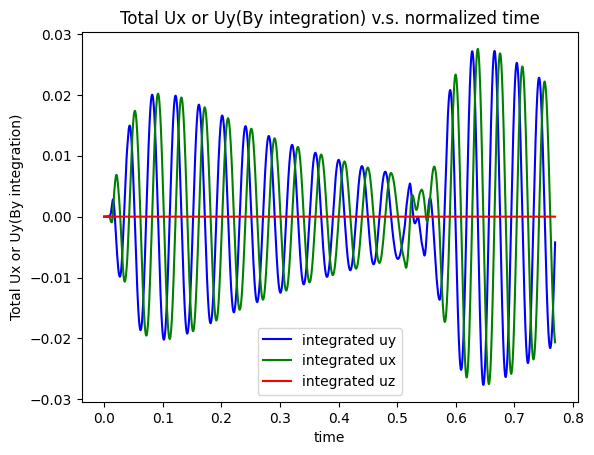

20358
20358
20358


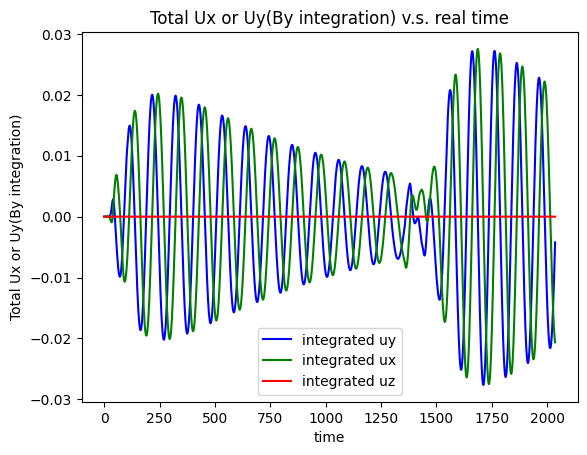

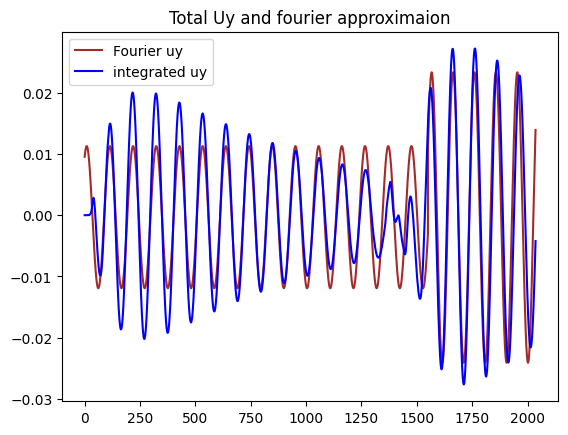

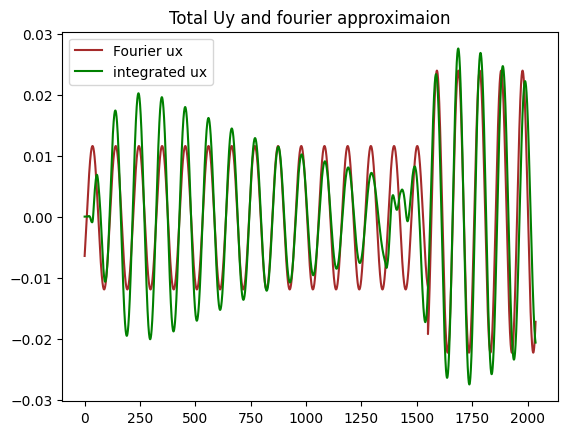

<Figure size 640x480 with 0 Axes>

In [16]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()
"""
I suspect that, because it is integrated, then total uz is always 0
"""

print(len(all_tot_uy))
time_x_axis = np.array([x/10 for x in range(1, len(all_tot_uy)+1)])
print(len(time_x_axis))
print(len(figure_x_axis))
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(time_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. real time')
plt.legend()
plt.show()
plt.clf()

approx_time_1 = time_x_axis[:15500]
approx_time_after = time_x_axis[15500:]
approx_uy_1 = alpha_for_uy_1[0]+alpha_for_uy_1[1]*np.cos(0.06* approx_time_1)+alpha_for_uy_1[2]*np.sin(0.06 * approx_time_1)
approx_uy_after = alpha_for_uy_after[0]+alpha_for_uy_after[1]*np.cos(0.065* approx_time_after)+alpha_for_uy_after[2]*np.sin(0.065 * approx_time_after)
approximation_uy = np.concatenate((approx_uy_1, approx_uy_after))


plt.plot(time_x_axis, approximation_uy,color = 'brown', label='Fourier uy')
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()


approx_ux_1 = alpha_for_ux_1[0]+alpha_for_ux_1[1]*np.cos(0.06* approx_time_1)+alpha_for_ux_1[2]*np.sin(0.06 * approx_time_1)
approx_ux_after = alpha_for_ux_after[0]+alpha_for_ux_after[1]*np.cos(0.065* approx_time_after)+alpha_for_ux_after[2]*np.sin(0.065 * approx_time_after)
approximation_ux = np.concatenate((approx_ux_1, approx_ux_after))


plt.plot(time_x_axis, approximation_ux,color = 'brown', label='Fourier ux')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.title('Total Uy and fourier approximaion')
plt.legend()
plt.show()
plt.clf()